In [1]:
import numpy as np
import aa as aa
import matplotlib.pyplot as plt
import scipy.linalg as la
plt.style.use('classic')

/Users/bodonoghue/miniconda2/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


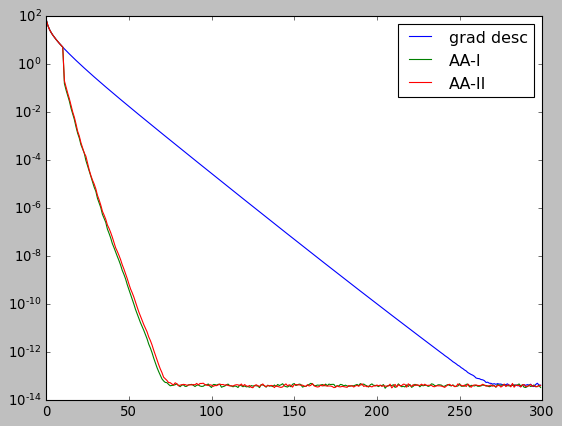

In [2]:
# Solving least squarse min_x ||Ax - b||^2

np.random.seed(123)

n = 100
m = 300
A = np.random.randn(m,n)
b = np.random.randn(m,1)
x_star = np.linalg.lstsq(A, b)[0]
f_star = 0.5 * (np.linalg.norm(A.dot(x_star) - b) ** 2)
N = 300
t = 0.002

gs_vanilla = []
gs_aa_1 = []
gs_aa_2 = []

x = np.zeros((n,1))
for i in range(N):
    x -= t * A.T.dot(A.dot(x) - b)
    gs_vanilla.append(np.linalg.norm( A.T.dot(A.dot(x) - b)))
    

aa_mem = 10

aa_wrk = aa.AndersonAccelerator(n, aa_mem, True, regularization=0)
x = np.zeros((n,1))
for i in range(N):
    if i > 0: aa_wrk.apply(x, x_prev)
    x_prev = np.copy(x)
    x -= t * A.T.dot(A.dot(x) - b)
    aa_wrk.safeguard(x, x_prev)
    gs_aa_1.append(np.linalg.norm( A.T.dot(A.dot(x) - b)))

aa_wrk = aa.AndersonAccelerator(n, aa_mem, False, regularization=0)
x = np.zeros((n,1))
for i in range(N):
    if i > 0: aa_wrk.apply(x, x_prev)
    x_prev = np.copy(x)
    x -= t * A.T.dot(A.dot(x) - b)
    aa_wrk.safeguard(x, x_prev)
    gs_aa_2.append(np.linalg.norm( A.T.dot(A.dot(x) - b)))

    
plt.semilogy(gs_vanilla, label='grad desc')
plt.semilogy(gs_aa_1, label='AA-I')
plt.semilogy(gs_aa_2, label='AA-II')

plt.legend()
plt.show()


====================== Type - I ======================
, iter: 20, len 20, info: 0, aa_norm 3.78e+04
AA reset.
Error in AA type 1, iter: 20, len 20, info: 0, aa_norm 3.88e+04
AA reset.
Error in AA type 1, iter: 20, len 20, info: 0, aa_norm 3.96e+04
AA reset.
Error in AA type 1, iter: 20, len 20, info: 0, aa_norm 3.97e+04
AA reset.
Error in AA type 1, iter: 20, len 20, info: 0, aa_norm 3.92e+04
AA reset.
Error in AA type 1, iter: 20, len 20, info: 0, aa_norm 3.89e+04
AA reset.
Error in AA type 1, iter: 20, len 20, info: 0, aa_norm 3.91e+04
AA reset.
Error in AA type 1, iter: 20, len 20, info: 0, aa_norm 3.91e+04
AA reset.
Error in AA type 1, iter: 20, len 20, info: 0, aa_norm 3.88e+04
AA reset.
Error in AA type 1, iter: 20, len 20, info: 0, aa_norm 3.85e+04
AA reset.
Error in AA type 1, iter: 20, len 20, info: 0, aa_norm 3.85e+04
AA reset.
Error in AA type 1, iter: 20, len 20, info: 0, aa_norm 3.89e+04
AA reset.
Error in AA type 1, iter: 20, len 20, info: 0, aa_norm 3.92e+04
AA reset.
E

Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.40e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.14e+04
AA reset.
AA rejection, iter: 11, norm_diff 1.6160e-03, prev_norm_diff 6.7772e-04
AA reset.
AA rejection, iter: 11, norm_diff 1.4256e-03, prev_norm_diff 6.7095e-04
AA reset.
AA rejection, iter: 11, norm_diff 1.2997e-03, prev_norm_diff 6.6463e-04
AA reset.
AA rejection, iter: 11, norm_diff 1.2156e-03, prev_norm_diff 6.5826e-04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.09e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.20e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.30e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.39e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.47e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.56e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.66e+04
AA reset.
Error 

Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.89e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.89e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.91e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.92e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.90e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.87e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.85e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.85e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.82e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.78e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.75e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.75e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.77e+04
AA reset.
Error in AA type 1, iter: 10, len 10, 

AA rejection, iter: 11, norm_diff 4.6277e-05, prev_norm_diff 7.1363e-06
AA reset.
AA rejection, iter: 11, norm_diff 1.2299e-05, prev_norm_diff 7.0198e-06
AA reset.
AA rejection, iter: 11, norm_diff 1.6456e-05, prev_norm_diff 6.9177e-06
AA reset.
AA rejection, iter: 11, norm_diff 1.0991e-05, prev_norm_diff 6.8222e-06
AA reset.
AA rejection, iter: 11, norm_diff 9.2994e-06, prev_norm_diff 6.7246e-06
AA reset.
AA rejection, iter: 11, norm_diff 8.2544e-06, prev_norm_diff 6.6241e-06
AA reset.
AA rejection, iter: 11, norm_diff 7.3576e-06, prev_norm_diff 6.5275e-06
AA reset.
AA rejection, iter: 11, norm_diff 6.6863e-06, prev_norm_diff 6.4410e-06
AA reset.
AA rejection, iter: 12, norm_diff 6.4241e-06, prev_norm_diff 6.2403e-06
AA reset.
AA rejection, iter: 11, norm_diff 1.7370e-05, prev_norm_diff 5.4002e-06
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 1.23e+04
AA reset.
AA rejection, iter: 11, norm_diff 1.7317e-05, prev_norm_diff 4.4022e-06
AA reset.
AA rejection, iter: 11, 

Error in AA type 1, iter: 10, len 10, info: 0,====================== Type - II ======================
 aa_norm 4.56e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 4.60e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 4.62e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 4.62e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 4.60e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 4.57e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 4.55e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 4.52e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 4.47e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 4.42e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 4.37e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 4.35e+04
AA reset.
Error in AA type 1, iter: 10, len 10, info: 0, aa_norm 4

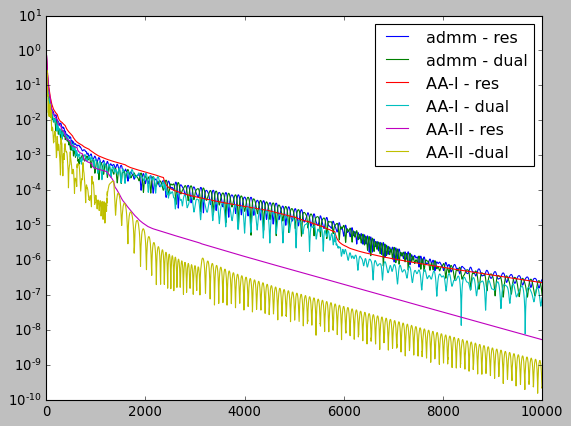

In [4]:
# l1 regularized least squares

np.random.seed(123)

n = 300
m = 100
mu = 0.1
rho = 0.1
N = 10_000

A = np.random.randn(m,n)
b = np.random.randn(m,1)

L = la.cho_factor(A.T.dot(A) + rho * np.identity(n))

def soft_thresh(y, t):
    return np.sign(y) * np.maximum(abs(y) - t, 0)

 
z0 = np.linalg.solve(A.T.dot(A), A.T.dot(b))

z = z0
lam = np.zeros((n,1))
res_vanilla = []
ds_vanilla = []
for i in range(N):
    z_old = z
    x = la.cho_solve(L, rho * (z + lam) + A.T.dot(b))
    z = soft_thresh(x - lam, mu / rho)
    lam = lam - x + z
    res_vanilla.append(np.linalg.norm(x-z))
    ds_vanilla.append(np.linalg.norm(z - z_old))

    
aa_mem = 10

print("====================== Type - I ======================")
z = z0
lam = np.zeros((n,1))
u = np.vstack((z,lam))
aa_wrk = aa.AndersonAccelerator(2 * n, aa_mem, True, regularization=1e-8, safeguard_factor=1.0, verbosity=1)
res_aa_1 = []
ds_aa_1 = []
for i in range(N):
    if i > 0: aa_wrk.apply(u, u_old)
    u_old = np.copy(u)
    x = la.cho_solve(L, rho * (z + lam) + A.T.dot(b))
    z = soft_thresh(x - lam, mu / rho)
    lam = lam - x + z
    u = np.vstack((z, lam))
    aa_wrk.safeguard(u, u_old)
    z = u[:n]
    z_old = u_old[:n]
    lam = u[n:]
    
    res_aa_1.append(np.linalg.norm(la.cho_solve(L, rho * (z + lam) + A.T.dot(b)) - z))
    ds_aa_1.append(np.linalg.norm(z - z_old))

print("====================== Type - II ======================")
z = z0
lam = np.zeros((n,1))
u = np.vstack((z,lam))
aa_wrk = aa.AndersonAccelerator(2 * n, aa_mem, False, regularization=1e-12, safeguard_factor=1.0, verbosity=1)
res_aa_2 = []
ds_aa_2 = []
for i in range(N):
    if i > 0: aa_wrk.apply(u, u_old)
    u_old = np.copy(u)
    x = la.cho_solve(L, rho * (z + lam) + A.T.dot(b))
    z = soft_thresh(x - lam, mu / rho)
    lam = lam - x + z
    u = np.vstack((z, lam))
    aa_wrk.safeguard(u, u_old)
    z = u[:n]
    z_old = u_old[:n]
    lam = u[n:]
    
    res_aa_2.append(np.linalg.norm(la.cho_solve(L, rho * (z + lam) + A.T.dot(b)) - z))
    ds_aa_2.append(np.linalg.norm(z - z_old))


plt.semilogy(res_vanilla, label='admm - res')
plt.semilogy(ds_vanilla, label='admm - dual')
plt.semilogy(res_aa_1, label='AA-I - res')
plt.semilogy(ds_aa_1, label='AA-I - dual')
plt.semilogy(res_aa_2, label='AA-II - res')
plt.semilogy(ds_aa_2, label='AA-II -dual')
#plt.semilogy(res_aa_1_p, label='AA-I-P - res')
#plt.semilogy(ds_aa_1_p, label='AA-I-P - dual')

plt.legend()
plt.show()